# 🏦 Bank Loan Analysis Report

### Step 1: Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### Step 2: Load and Explore Data

In [3]:
df=pd.read_csv("financial_loan.csv", encoding= 'unicode_escape')

In [4]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
print(f"No. of Rows: {df.shape[0]} \nNo. of Columns: {df.shape[1]}")

No. of Rows: 38576 
No. of Columns: 24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
#check for null values
pd.isnull(df).sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [7]:
#check for duplicated values
df.duplicated().sum()

np.int64(0)

In [8]:
#check for duplicated values for customerID
df['id'].duplicated().sum()

np.int64(0)

### Step 3: Data Cleaning

In [7]:
# change data type
df['issue_date']= pd.to_datetime(df['issue_date'] ,format='%d-%m-%Y')
df['last_credit_pull_date']= pd.to_datetime(df['last_credit_pull_date'] ,format='%d-%m-%Y')
df['last_payment_date']= pd.to_datetime(df['last_payment_date'] ,format='%d-%m-%Y')
df['next_payment_date']= pd.to_datetime(df['next_payment_date'] ,format='%d-%m-%Y')

In [76]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [9]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [10]:
# use describe() for specific columns
df[['annual_income', 'dti', 'installment','int_rate','loan_amount','total_acc','total_payment']].describe()

,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Step 4: Exploratory Data Analysis (EDA)

### Key Performance Indicators (KPIs)

- #### Total Loan Applications

In [11]:
print(f"Total Loan Applications : {df['id'].count()} ")

Total Loan Applications : 38576 


- #### Month-to-Date (MTD) Loan Applications

In [12]:
latest_issue_date= df['issue_date'].max()
latest_year= latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

print(f"Month-to-Date (MTD) Loan Applications(for {latest_issue_date.strftime('%B %Y')}) : {mtd_data['id'].count()} ")

Month-to-Date (MTD) Loan Applications(for December 2021) : 4314 


- #### Total Funded Amount

In [13]:
Amount=df['loan_amount'].sum() / 1000000

print("Total Funded Amount: $ {:.2f}M".format(Amount) )

Total Funded Amount: $ 435.76M


- #### Month-to-Date (MTD) Funded Amount

In [14]:
latest_issue_date= df['issue_date'].max()
latest_year= latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

Amount=mtd_data['loan_amount'].sum() / 1000000

print("Month-to-Date (MTD) Funded Amount: $ {:.2f}M".format(Amount))

Month-to-Date (MTD) Funded Amount: $ 53.98M


- #### Total Amount Received

In [15]:
Amount=df['total_payment'].sum() / 1000000

print("Total Amount Received: $ {:.2f}M".format(Amount) )

Total Amount Received: $ 473.07M


- #### Month-to-Date (MTD) Amount Received

In [16]:
latest_issue_date= df['issue_date'].max()
latest_year= latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

Amount=mtd_data['total_payment'].sum() / 1000000

print("Month-to-Date (MTD) Amount Received: $ {:.2f}M".format(Amount))

Month-to-Date (MTD) Amount Received: $ 58.07M


**Insight:**  The portfolio generated a gross return of **37.31 Million Doller**. This net positive cash flow confirms the profitability of the lending operation, as the total amount received (**473.07 Million Doller**) successfully covered and exceeded the total capital funded (**435.76 Million Doller**).

- #### Average Interest Rate

In [17]:
Average=df['int_rate'].mean() * 100

print("Average Interest Rate: {:.2f}M".format(Average) )

Average Interest Rate: 12.05M


- #### Average Debt-to-Income Ratio (DTI)

In [18]:
Average=df['dti'].mean() * 100

print("Average Debt-to-Income Ratio (DTI): {:.2f}M".format(Average) )

Average Debt-to-Income Ratio (DTI): 13.33M


### Good Loan vs Bad Loan KPI's

### Good Loan :

In [38]:
goodloan= df[df["loan_status"].isin(["Fully Paid","Current"]) ]

total_loan_aplication= df["id"].count()
good_loan_application= goodloan['id'].count()

loan_funded_amount= goodloan['loan_amount'].sum()/ 1000000
loan_total_received= goodloan['total_payment'].sum() / 1000000
loan_percentage= (good_loan_application / total_loan_aplication) * 100

print("Good Loan Applications:",good_loan_application)
print("Good Loan Funded Amount: $ {:.2f}M".format(loan_funded_amount))
print("Good Loan Total Received Amount: $ {:.2f}M ".format(loan_total_received))
print("Good Loan Applications Percentage: {:.2f}%".format(loan_percentage))

print("Profit: $ {:.2f}M".format(loan_total_received-loan_funded_amount))

Good Loan Applications: 33243
Good Loan Funded Amount: $ 370.22M
Good Loan Total Received Amount: $ 435.79M 
Good Loan Applications Percentage: 86.18%
profit: $ 65.56M


**Insight:**  The vast majority of the portfolio, **86.18%** of all loans, were successful (Good Loans). This segment is the core source of revenue, generating an implied profit of **$65.57 million** from interest and fees. 

### Bad Loan :

In [40]:
badloan= df[df["loan_status"].isin(["Charged Off"]) ]

total_loan_aplication= df["id"].count()
bad_loan_application= badloan['id'].count()

loan_funded_amount= badloan['loan_amount'].sum()/ 1000000
loan_total_received= badloan['total_payment'].sum() / 1000000
loan_percentage= (bad_loan_application / total_loan_aplication) * 100

print("Bad Loan Applications:",bad_loan_application)
print("Bad Loan Funded Amount: $ {:.2f}M".format(loan_funded_amount))
print("Bad Loan Total Received Amount: $ {:.2f}M ".format(loan_total_received))
print("Bad Loan Applications Percentage: {:.2f}%".format(loan_percentage))

print("Loss: $ {:.2f}M".format(loan_funded_amount-loan_total_received))

Bad Loan Applications: 5333
Bad Loan Funded Amount: $ 65.53M
Bad Loan Total Received Amount: $ 37.28M 
Bad Loan Applications Percentage: 13.82%
Loss: $ 28.25M


**Insides:** The bank incurred an actual loss of **$28.25 Million** due to defaulted loans (Charged Off). While the Bad Loan Rate is **13.82%** of the portfolio, this small percentage of loans accounts for a disproportionate financial impact, representing the primary risk area for the bank.

## Charts

### Monthly Trends by Issue Date for Total Funded Amount

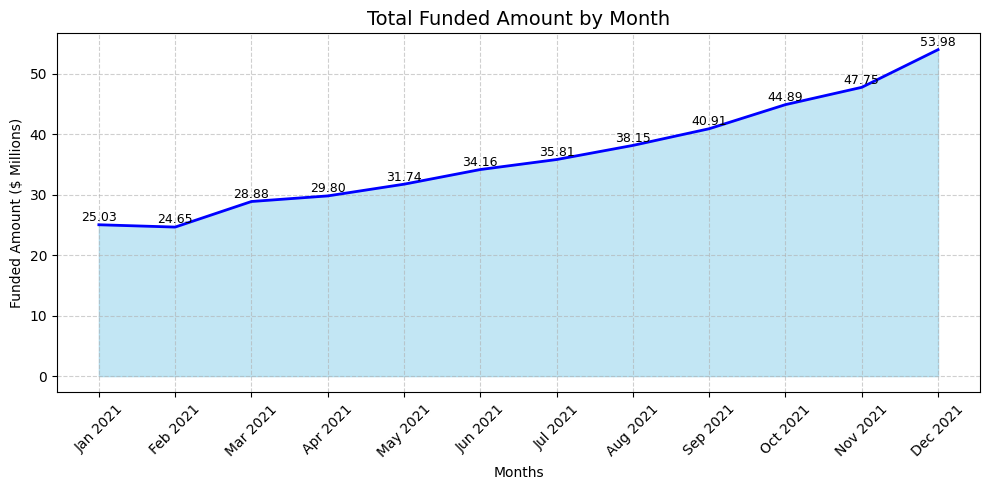

In [42]:
monthly_funded= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)["loan_amount"]
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth=2)

for i ,row in monthly_funded.iterrows():
    plt.text(i ,row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title("Total Funded Amount by Month",fontsize=14)
plt.xlabel("Months")
plt.ylabel("Funded Amount ($ Millions)")
plt.xticks(ticks= range(len(monthly_funded)), labels= monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Capital Growth :** The bank is successfully keeping up with the high demand. The total amount of money lent out each month increased at the same fast rate as the applications.

**Peak Lending :** The largest amount of money was funded in December 2021, proving the bank has the operational capacity to scale its lending business.

### Monthly Trends by Issue Date for Total Amount Received

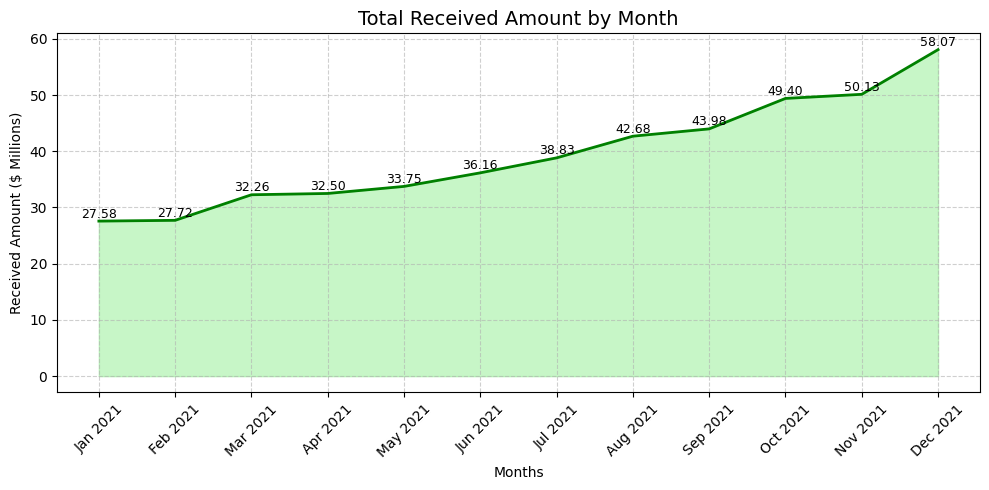

In [41]:
monthly_received= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)["total_payment"]
    .sum()
    .div(1000000)
    .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'],color='lightgreen',alpha=0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color='green',linewidth=2)

for i ,row in monthly_received.iterrows():
    plt.text(i ,row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title("Total Received Amount by Month",fontsize=14)
plt.xlabel("Months")
plt.ylabel("Received Amount ($ Millions)")
plt.xticks(ticks= range(len(monthly_received)), labels= monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Cash Flow Stability :** The cash coming back to the bank is strong and reliable. The total amount received from payments (interest + principal) grew steadily every month.

**Portfolio Health :** This confirms that the new loans being added are performing well and that the portfolio is generating stable and rising cash flow as it grows larger.

### Monthly Trends by Issue Date for Total Loan Application

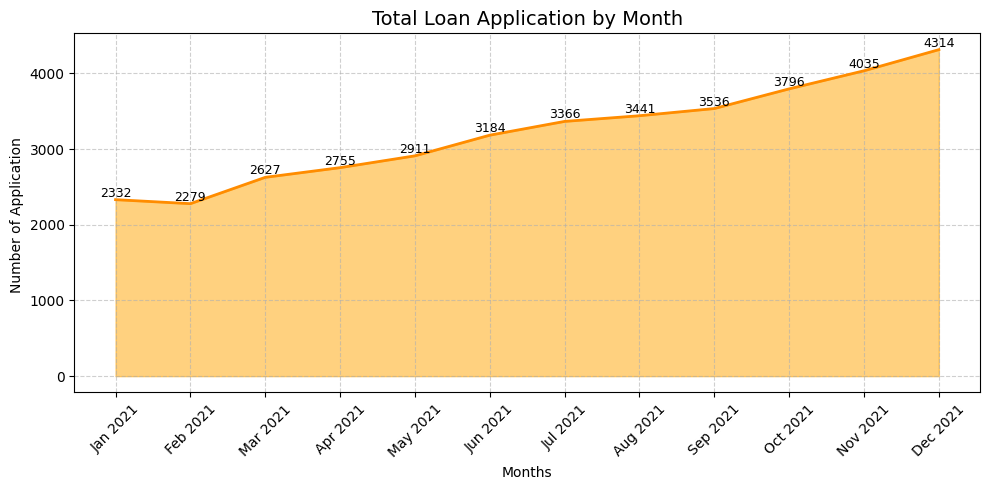

In [43]:
monthly_application= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)["id"]
    .count()
    .reset_index(name='loan_application_count')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_application['month_name'],monthly_application['loan_application_count'],color='orange',alpha=0.5)
plt.plot(monthly_application['month_name'],monthly_application['loan_application_count'],color='darkorange',linewidth=2)

for i ,row in monthly_application.iterrows():
    plt.text(i ,row['loan_application_count'] , f"{row['loan_application_count']}",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title("Total Loan Application by Month",fontsize=14)
plt.xlabel("Months")
plt.ylabel("Number of Application ")
plt.xticks(ticks= range(len(monthly_application)), labels= monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Demand Surge :** Customer interest in loans grew very quickly. The number of new loan applications increased every month, reaching its highest point in December 2021.

**Market Signal :** This shows that the market is very receptive to the bank's loan products and that demand is strong and rapidly rising.

### 🎯 Overall Monthly Trend Conclusion (Portfolio Growth)
The bank's loan portfolio is in a phase of rapid, successful expansion.

The trends clearly show that customer demand (Applications) is skyrocketing, with volumes increasing steeply throughout the year and peaking in December 2021. Critically, the bank's operations have successfully scaled capital deployment (Funded Amount) to match this surge, confirming its capacity for growth.

This successful scaling is translating directly into financial health, as the Money Paid Back (Amount Received) is also showing a stable, continuous rise, indicating a strong and growing operational cash flow.

### Regional Analysis by State for Total Funded Amount

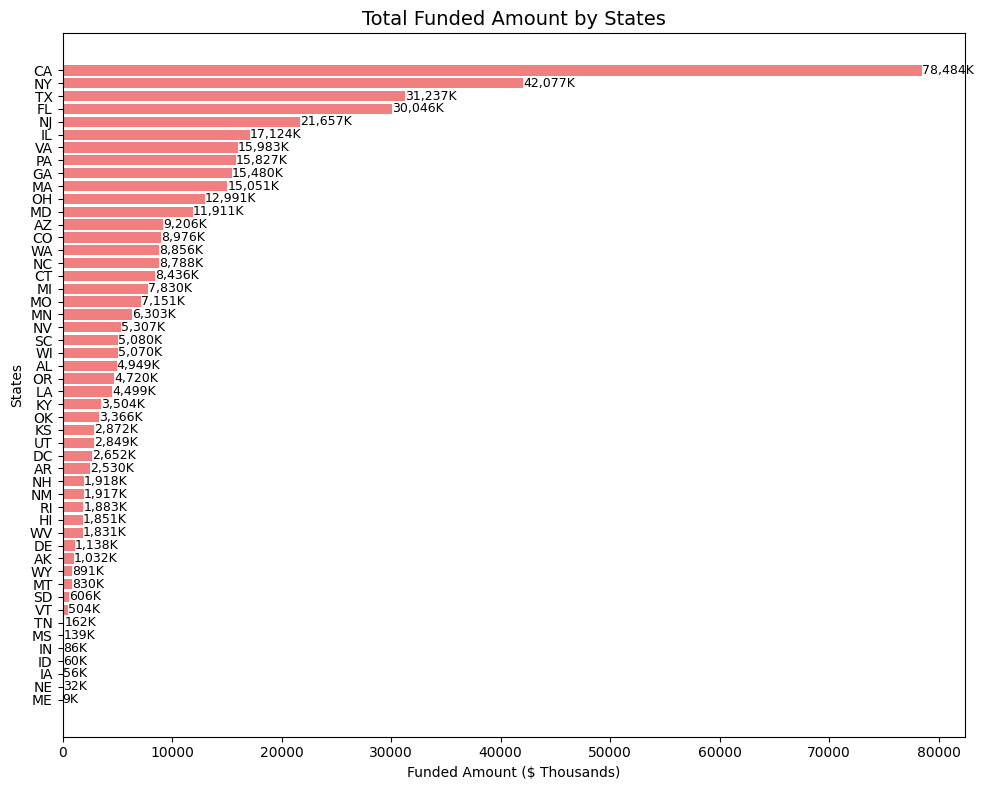

In [47]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending= True) / 1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding.index,state_funding.values,color='lightcoral')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Funded Amount by States",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("States")
plt.tight_layout()
plt.show()

**Insight:**

**Capital Focus :** The bank invests the most money in California. The amount of capital lent out in CA is much higher than any other state, showing that the bank's funding decisions are directly aligned with where the customer demand is highest.

**Funding Strategy :** Funding is concentrated in a few areas. The top four states that apply for loans are also the top four states that receive the most funding, confirming a focused and efficient capital deployment strategy.

### Regional Analysis by State for Total Amount Received

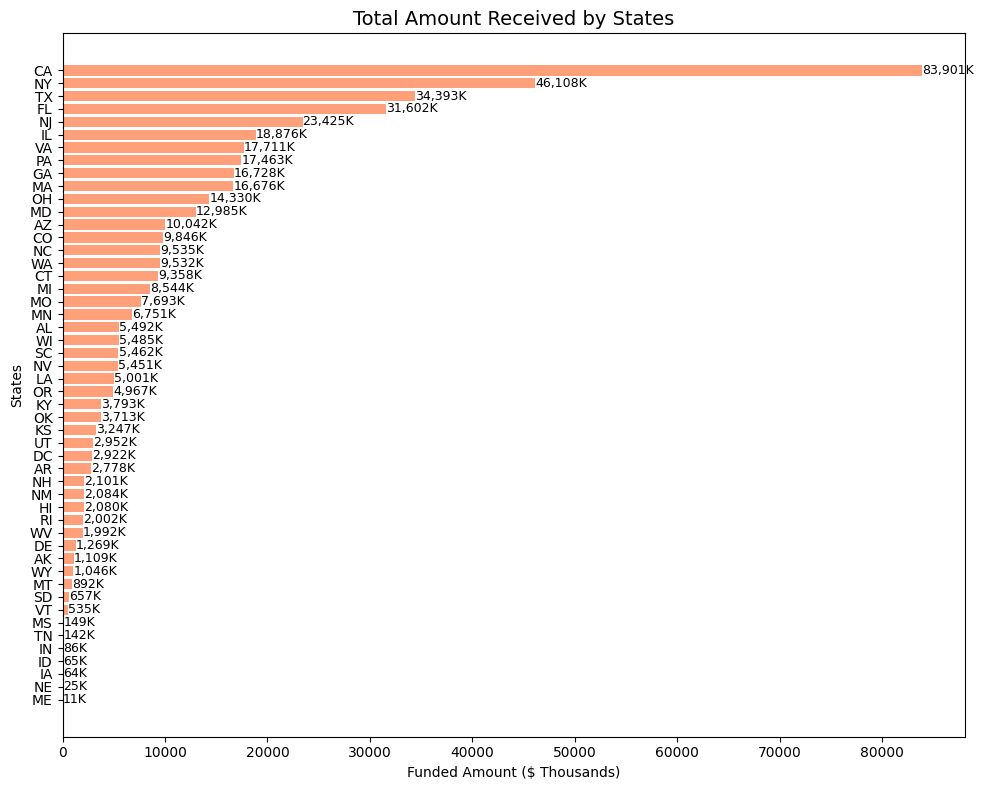

In [46]:
state_funding = df.groupby('address_state')['total_payment'].sum().sort_values(ascending= True) / 1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding.index,state_funding.values,color='lightsalmon')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Amount Received by States",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("States")
plt.tight_layout()
plt.show()

**Insight:** 

**Revenue Driver :** California generates the highest revenue. CA returns the largest total amount of money to the bank from all loan payments (principal plus interest).

**Stable Returns :** The ranking for the amount of money received is almost identical to the ranking for money lent. This means the bank is reliably getting its money back from its key markets, and the biggest lending areas are also the biggest profit centers.

### Regional Analysis by State for Total Loan Application

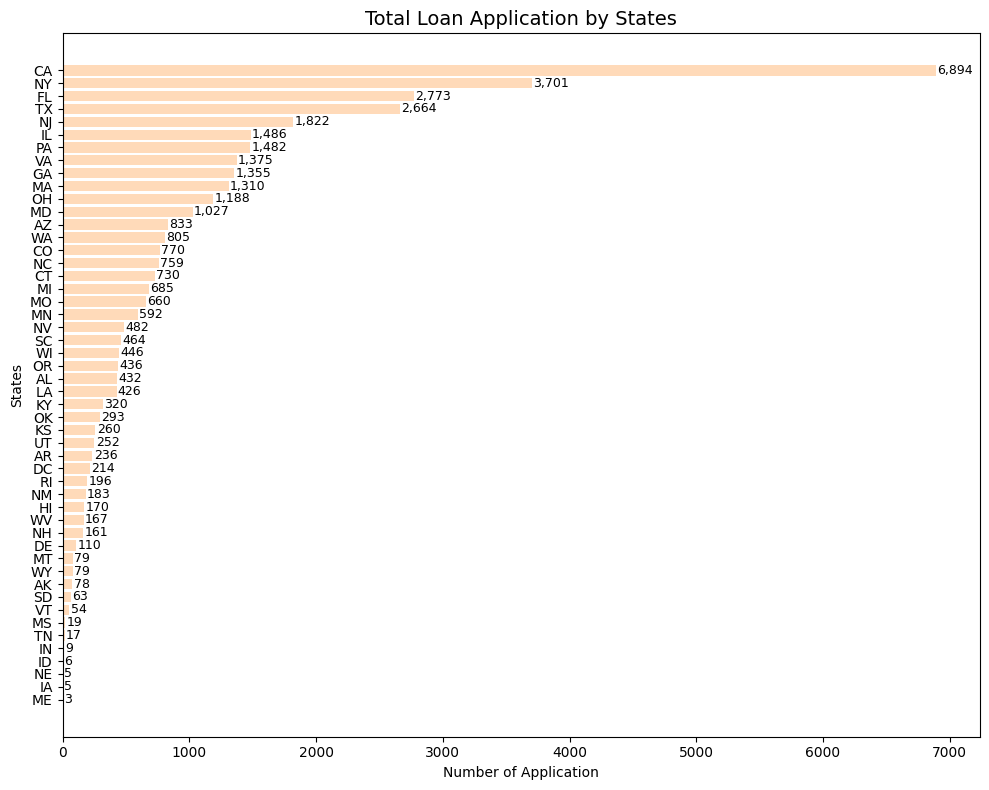

In [49]:
state_funding = df.groupby('address_state')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding.index,state_funding.values,color='peachpuff')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}" , va='center', fontsize=9)

plt.title("Total Loan Application by States",fontsize=14)
plt.xlabel("Number of Application")
plt.ylabel("States")
plt.tight_layout()
plt.show()

**Insight:**  
**CA Dominance :** California (CA) is the most important state for getting new customers. It has by far the highest number of loan applications, making it the bank's core market for customer acquisition. 

**Top 4 States :** After CA, the states of New York (NY), Texas (TX), and Florida (FL) bring in the next largest number of applications, making them key regional hubs that should be supported

### 🎯 Overall Regional Conclusion (Market Concentration)
The bank's business is currently highly centralized and dependent on one market: California (CA).

The analysis shows that CA is the overwhelming leader in applications, funded amount, and total payments received. This means CA provides the most demand, receives the most capital investment, and generates the highest revenue.

While this concentration is great for efficiency, it also means the bank is exposed to significant regional risk. Any economic downturn or regulatory change in California would have a major and immediate impact on the bank's entire portfolio performance. The bank should look to slowly grow its presence in strong secondary markets like New York (NY), Texas (TX), and Florida (FL) to diversify its risk.

### Loan Term Analysis By Total Funded Amount

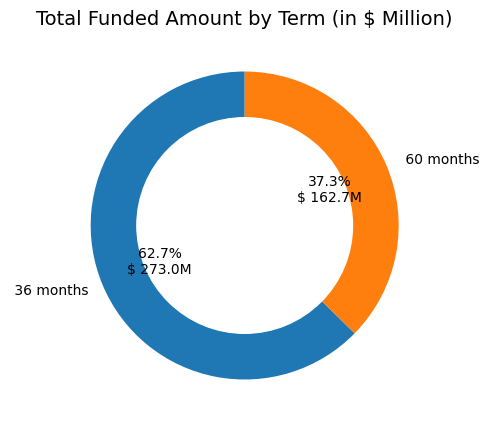

In [52]:
team_funding= df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    team_funding, labels=team_funding.index,
    autopct= lambda p: f"{p:.1f}%\n$ {p*sum(team_funding)/100:.1f}M",
    startangle=90, wedgeprops= {'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Million)",fontsize=14)
plt.show()

**Insight:** 

**Funding Focus :** The most capital is deployed into 36-month loans. The bank funds more dollars into the shorter term, which is directly aligned with the higher customer demand.

**Risk vs. Volume :** While the 36-month term dominates in volume, the 60-month term still represents a significant capital commitment, meaning the bank must monitor the long-term risk associated with these five-year loans closely.

### Loan Term Analysis By Total Amount Received

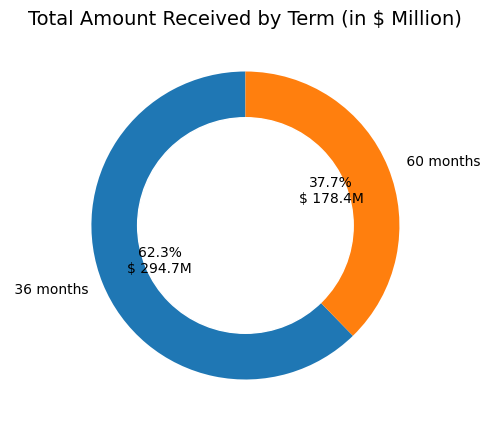

In [54]:
team_funding= df.groupby('term')['total_payment'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    team_funding, labels=team_funding.index,
    autopct= lambda p: f"{p:.1f}%\n$ {p*sum(team_funding)/100:.1f}M",
    startangle=90, wedgeprops= {'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Amount Received by Term (in $ Million)",fontsize=14)
plt.show()

**Insight:** 

**Revenue Stream :** The shorter term is the primary source of cash flow. 36-month loans return much more money to the bank than 60-month loans.

**Cash Cycle :** The 36-month term is preferred because it allows the bank to redeploy capital faster and manage a more rapid cash cycle compared to the longer 60-month term

### Loan Term Analysis By Total Loan Application

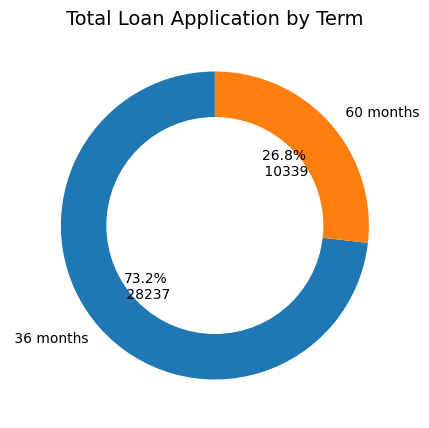

In [56]:
team_funding= df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))
plt.pie(
    team_funding, labels=team_funding.index,
    autopct= lambda p: f"{p:.1f}%\n {round(p*sum(team_funding)/100)}",
    startangle=90, wedgeprops= {'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Loan Application by Term",fontsize=14)
plt.show()

**Insight:** 

**Clear Preference :** Borrowers overwhelmingly prefer the shorter, 36-month loan term. These loans account for the vast majority of all applications.

**60-Month Role :** The 60-month term is a necessary but minority product, suggesting it's primarily used for larger loans or for borrowers needing lower monthly payments.

### 🎯 Overall Loan Term Conclusion (Strategy Focus)
The bank's portfolio is structurally dominated by the 36-month loan term, which leads in applications, funded amount, and cash flow return.

The 36-month term is the core of the business, enabling a faster capital turnover. While the 60-month term is a much smaller product, it carries a higher implied risk due to its longer duration, so the bank must ensure the higher interest rate charged on these loans adequately compensates for this extended risk. Risk strategies and profit modeling should be primarily weighted toward the performance of the 36-month portfolio.

### Employee Length Analysis By Total Funded Amount

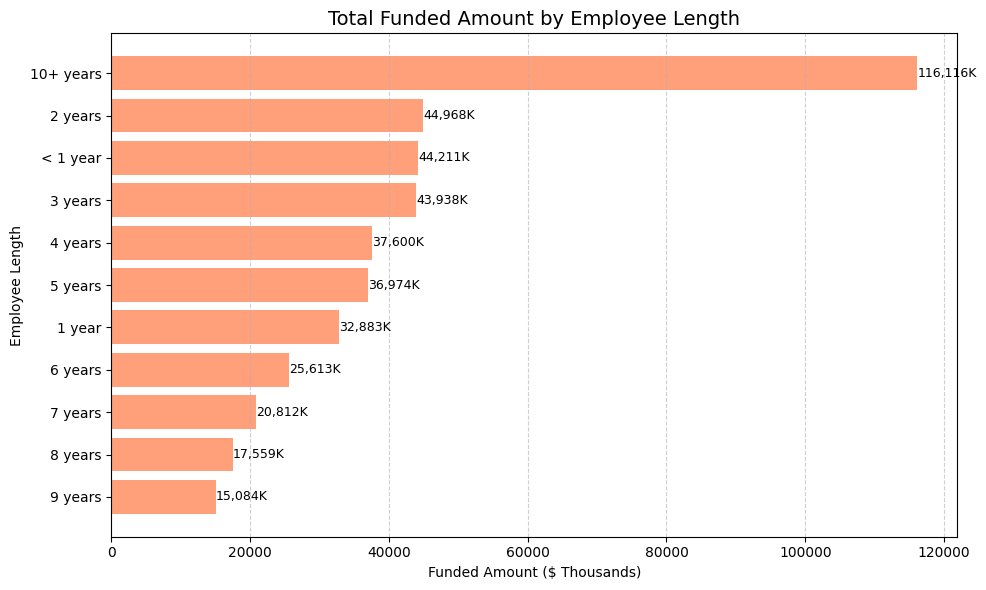

In [58]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index,emp_funding.values,color='lightsalmon')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Funded Amount by Employee Length",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Employee Length")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Funding Stability :** The bank commits the most capital to borrowers with 10+ years of employment. This suggests the bank has confidence in the repayment ability of its most stable customers.

**Risk Allocation :** The amount funded to the "less than 1 year" group is significantly lower than the 10+ years group, showing the bank is cautiously allocating less capital to less stable applicants.

### Employee Length Analysis By Total Amount Received

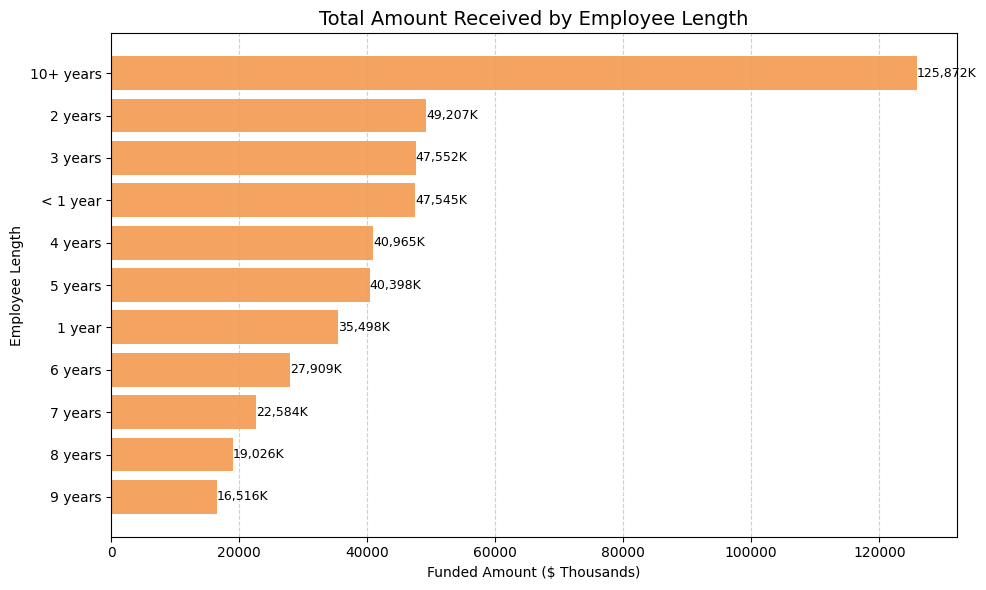

In [60]:
emp_funding = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index,emp_funding.values,color='sandybrown')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Amount Received by Employee Length",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Employee Length")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Revenue Source :** Long-term employees (10+ years) are the biggest source of revenue. This group returns the highest amount of money to the bank through payments, confirming they are the most financially reliable segment.

**Payment Reliability :** The total cash returned across the employment categories roughly follows the length of employment, with higher stability leading to higher revenue generation.

### Employee Length Analysis By Total Loan Application

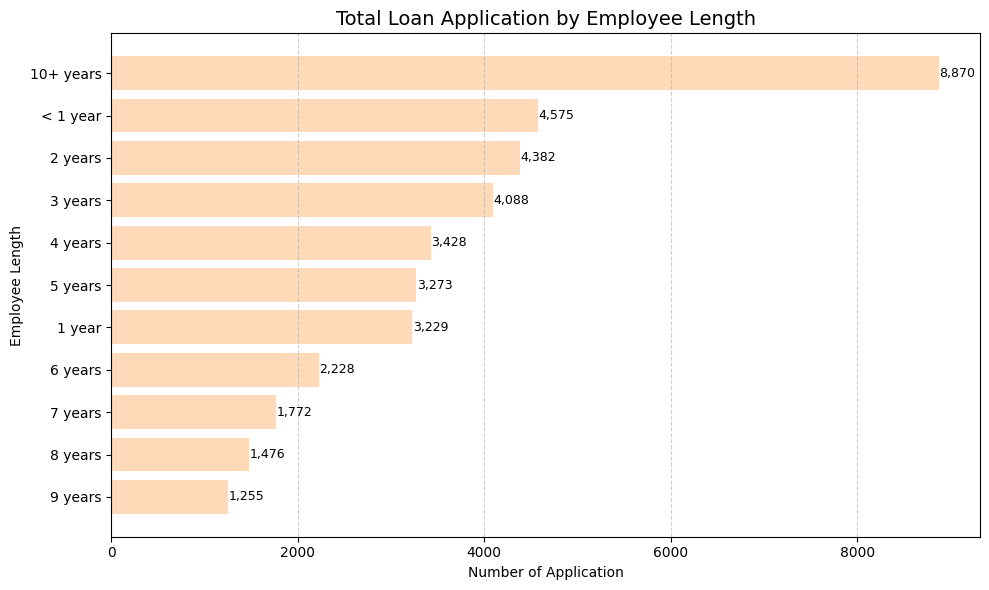

In [62]:
emp_funding = df.groupby('emp_length')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index,emp_funding.values,color='peachpuff')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}" , va='center', fontsize=9)

plt.title("Total Loan Application by Employee Length",fontsize=14)
plt.xlabel("Number of Application")
plt.ylabel("Employee Length")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Stable Core :** The largest group of borrowers, by far, are those with 10+ years of employment. This shows the bank's customer base is generally experienced and stable.

**New Borrower Risk :**	The second-largest group is the "less than 1 year" category. This high volume of new job holders represents a key risk area, as new employees are typically less stable.

### 🎯 Overall Employee Length Conclusion (Stability and Risk)
The bank's portfolio is built on a foundation of financially stable borrowers, with the 10+ years employment segment dominating the market share, funding, and revenue generation. This is the most valuable and reliable customer segment.

However, the "less than 1 year" employment group represents a major volume-based risk. While the bank allocates less capital to them, their high number of applications means they are a critical group to manage. Underwriting and pricing should be strictest for the "less than 1 year" group to balance the inherent instability of new employment against the high demand from this segment.

### Loan Purpose Breakdown By Total Funded Amount

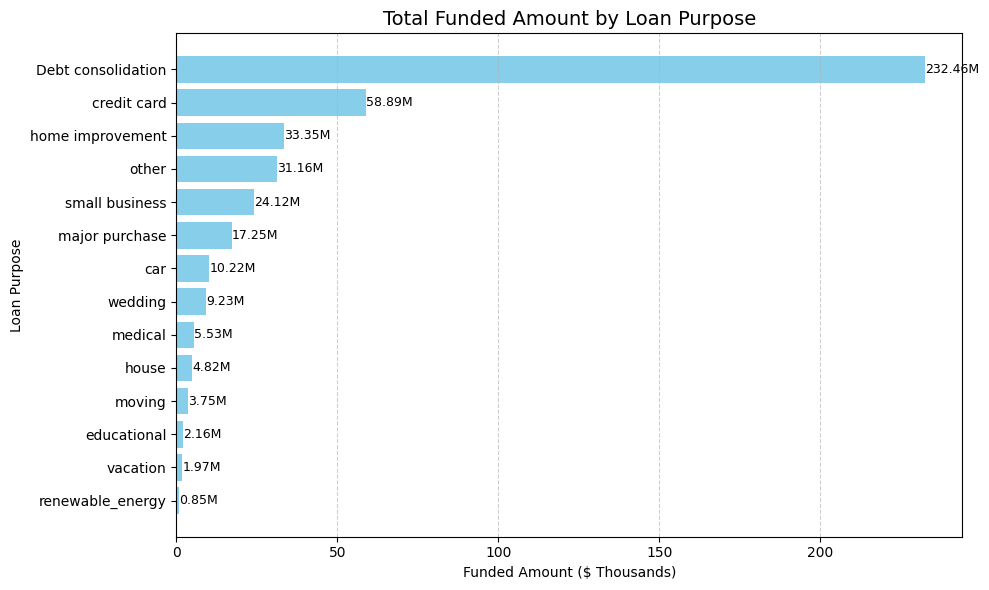

In [64]:
purpose_funding = df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding.index,purpose_funding.values,color='skyblue')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
              f"{width:,.2f}M" , va='center', fontsize=9)

plt.title("Total Funded Amount by Loan Purpose",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Loan Purpose")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Funding Focus :** The bank puts the most capital into Debt Consolidation loans. This confirms that the bank actively funds the type of loan that customers request most often.

**Risk Concentration :** The business is highly reliant on a single product type. This means any changes in the risk profile of Debt Consolidation loans will heavily impact the entire portfolio.

### Loan Purpose Breakdown By Total Amount Received

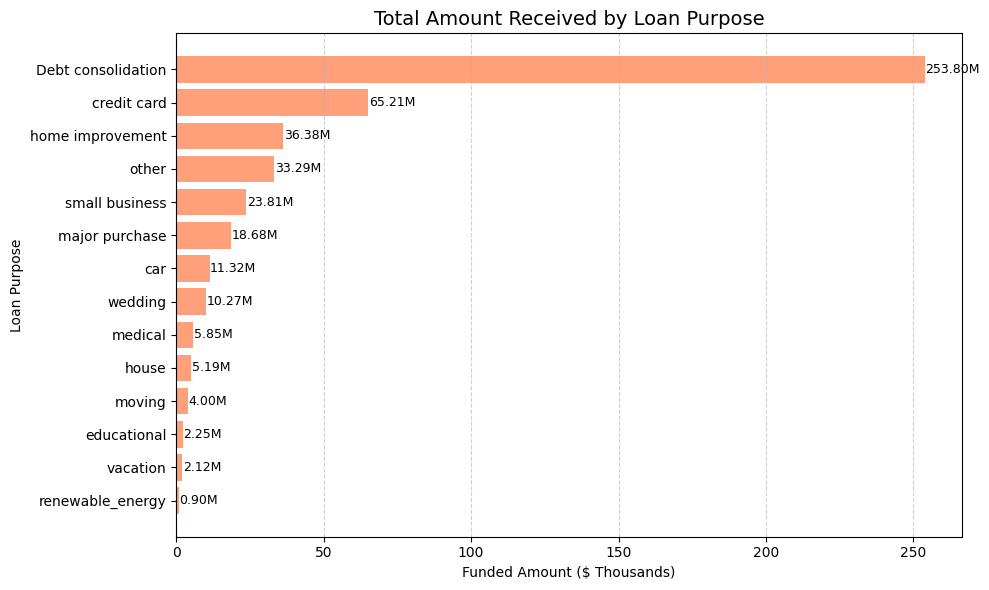

In [66]:
purpose_funding = df.groupby('purpose')['total_payment'].sum().sort_values() / 1000000

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding.index,purpose_funding.values,color='lightsalmon')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
              f"{width:,.2f}M" , va='center', fontsize=9)

plt.title("Total Amount Received by Loan Purpose",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Loan Purpose")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Revenue Driver :** Debt Consolidation is the bank's biggest source of cash flow. It returns the highest total amount of money through payments.

**Core Business :** This confirms that Debt Consolidation is not just the biggest product; it's the core engine that drives the bank's revenue and covers the cost of capital.

### Loan Purpose Breakdown By Total Loan Application

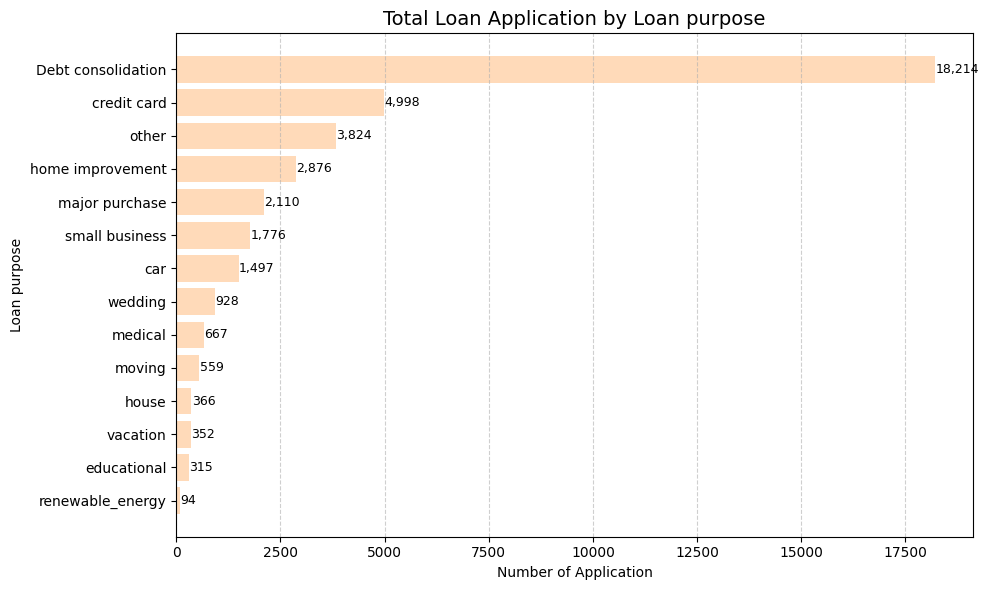

In [68]:
purpose_funding = df.groupby('purpose')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding.index,purpose_funding.values,color='peachpuff')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}" , va='center', fontsize=9)

plt.title("Total Loan Application by Loan purpose",fontsize=14)
plt.xlabel("Number of Application")
plt.ylabel("Loan purpose")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** 

**Clear Demand :** Debt Consolidation is the bank's main product. It accounts for a massive number of applications—far more than any other purpose.

**Secondary Needs :** The next two most common reasons for a loan are Credit Card payoff and Other needs, showing that most customers are looking to manage or reduce existing debt.

### 🎯 Overall Loan Purpose Conclusion (Business Strategy)
The bank is fundamentally a Debt Consolidation lender. This loan type drives the vast majority of customer demand, funded capital, and total revenue.

This concentration is a double-edged sword: it offers clear focus and high volume, but it creates a single point of business risk. If the default rate on Debt Consolidation loans rises, the entire portfolio will suffer significant losses. All future business strategies—from pricing and underwriting to marketing—must be primarily focused on optimizing the performance and minimizing the risk of the Debt Consolidation segment.

### Home Ownership Analysis By Total Funded Amount

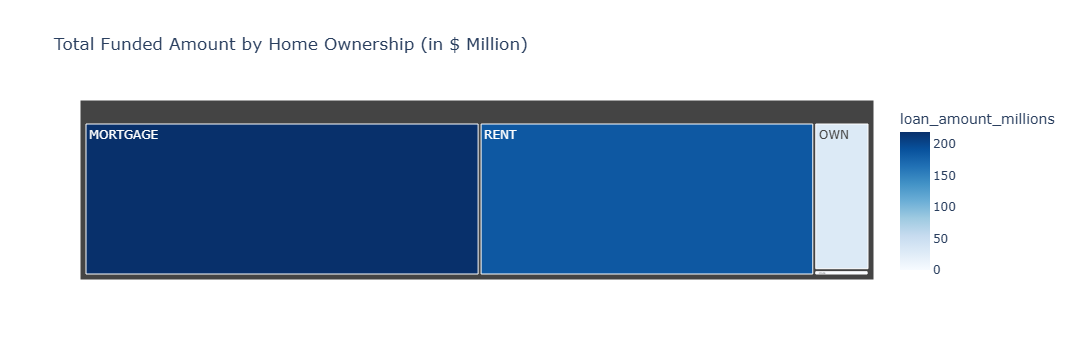

In [75]:
home_funding= df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']= home_funding['loan_amount'] / 1000000

fig= px.treemap(
    home_funding, path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='blues',
    title="Total Funded Amount by Home Ownership (in $ Million)"
)
fig.show()


**Insight:** 

**Funding Focus :** The bank lends the most money to customers who have a Mortgage (MORTGAGE). This shows the bank has the highest confidence in the financial standing of these borrowers, who typically have more assets.

**Rent vs. Mortgage :** The amount lent to Renters (RENT) is significantly high, but still much less than the Mortgage group, reflecting a cautious approach to borrowers without real estate assets.

### Home Ownership Analysis By Total Amount Received

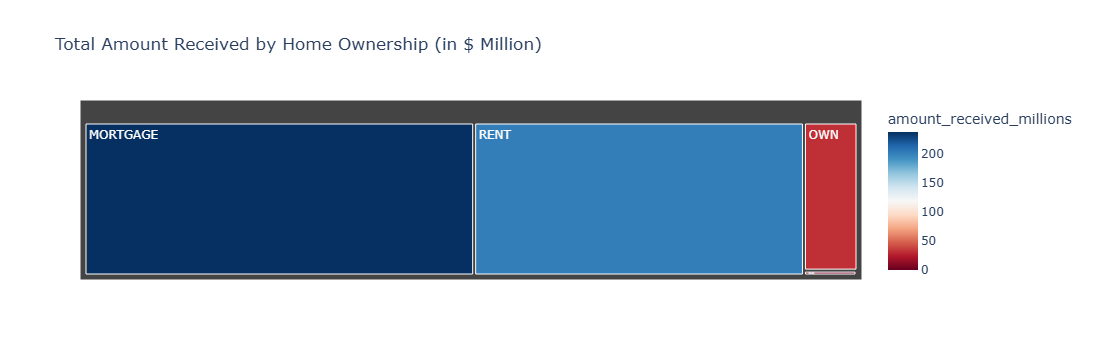

In [33]:
home_funding= df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_funding['amount_received_millions']= home_funding['total_payment'] / 1000000

fig= px.treemap(
    home_funding, path=['home_ownership'],
    values='amount_received_millions',
    color='amount_received_millions',
    color_continuous_scale='RdBu',
    title="Total Amount Received by Home Ownership (in $ Million)"
)

fig.show()


**Insight:** 

**Revenue Stability :** Mortgage holders are the bank's most valuable revenue source. They return the largest amount of money through loan payments, confirming their superior financial reliability.

**Cash Flow Groups :** Payments from Renters form the second-largest stream of cash flow, but the gap between the Mortgage group and the RENT group is large.

### 🎯 Overall Home Ownership Conclusion (Stability and Wealth)
The bank's financial stability is highly dependent on Mortgage holders (MORTGAGE). This segment receives the most funding and reliably generates the highest revenue. This is a common and sound strategy, as mortgage holders are generally seen as lower risk due to their established assets.

However, the Renters (RENT) group is the largest segment by loan application count (from previous analysis) and receives the second-highest amount of funding. This segment is typically higher risk. Therefore, the bank must ensure the interest rates and underwriting criteria for renters are appropriately higher to cover the increased risk of default compared to asset-owning borrowers.

### 🏁 Final Conclusion: Loan Portfolio Risk & Strategy 🎯

*This analysis confirms the bank's loan business is in a phase of **rapid, profitable growth**, but this success is highly dependent on a few key segments, which introduces major risk concentrations.*

#### 1. The Financial Snapshot: Profit vs. Loss
   - **Good Loans:** 86.18% of the total portfolio is performing successfully, generating an estimated $65.57 Million in profit.

   - **Bad Loans (Charged Off):** 13.82% of the portfolio has failed, resulting in an actual loss of $28.25 Million.

   - **Overall Result:** Despite the losses, the portfolio remains profitable, yielding a net profit of $37.31 Million.

   - **Conclusion:** The primary financial goal is to reduce the $28.25M loss to significantly increase the bank's overall profit margin.

#### 2. Risk Concentration: What Drives the Business

   - **Product Focus - Debt Consolidation:** The bank is highly focused on Debt Consolidation loans, which drive the most revenue. This creates a Single Point of Risk, as any change in the product's risk profile could severely impact the entire bank's finances.

   - **Market Location - California (CA):** The business is heavily dependent on California (CA) for customers, funding, and revenue. This exposes the bank to Regional Risk, meaning an economic slowdown in California would immediately and hugely impact the portfolio.

   - **Loan Term Preference:** Customers overwhelmingly prefer the 36-month term, which allows for faster capital turnover and must remain the priority for optimized capital deployment.

#### 3. Borrower Risk Profile: Best vs. Worst

   - **Most Reliable Customers:** These core segments, which should be prioritized for higher funding limits, include customers with 10+ years of employment and those who own a home (Mortgage).

   - **Highest Risk Customers (by Volume):** These segments, which require the strictest underwriting and pricing, are customers with less than 1 year of employment and those who Rent.

#### 🔑 Summary Action Steps

To increase net profit, the bank must proactively reduce the $\mathbf{\$28.25M}$ loss by:

  1. **Tightening Underwriting:** Making the eligibility rules for Debt Consolidation loans much stricter.

  2. **Risk Mitigation:** Being more cautious when lending to Renters and people with less than 1 year of employment.

  3. **Market Diversification:** Working to grow the loan business outside of California (e.g., in NY, TX, FL) to lower regional risk exposure.